In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# I. Introduction 

   The Covid-19 pandemic has spread greatly across the globe within a few months since the virus was introduced to humans in December of 2019. Every day, thousands of people are being infected by the novel coronavirus (SARS-CoV-2). The pandemic has had catastrophic impacts on certain areas such as global metropolises like New York, Paris and London while other major cities like Bangkok, Baghdad, New Delhi and Lagos have, so far, largely been spared.

   The following report uncovers how factors related to the spread of Covid-19 (population, total numbers of tests, total number of serious/critical cases, etc.) are correlated with the number of coronavirus cases per nation. In hopes to provide insight, through analyses of various factors, on how nations with varying levels of healthcare infrastructures (based on Global Health Index) could potentially respond to the Covid-19 pandemic by identifying risk factors. 
 
   The goal of this project is to develop a model that analyzes the different attributes that potentially affect the total cases of Covid-19 within nations, in an effort to reveal which attributes are truly correlated with Total Cases of Covid-19 per nation. 

# II. Data Description

### 1. Motivation

The datasets were created to track and evaluate the impact of varying levels of healthcare infrastructure on the global spread of the Covid-19 pandemic by country. Tracking these variables would allow for health and government officials to know the scope of the coronavirus’ spread around the world in efforts to aid mitigation strategies related to the virus. 

Data from Worldometer contains live counts of the total number of Covid-19 cases, deaths,  number of tests per nation, etc, while data from the Global Health and Security Index ranks 196 nations in their health security and related capabilities. Utilizing these datasets, will allow us to investigate underling factors contributing to the spread of the virus.

### 2 . Composition
#### Covid-19 Dataset
The instances that compromise the Covid-19 dataset that was webscraped from Worlometer (as of 5/18/2020) represent countries/territories and the extent of the Covid-19 spread. There are a total of 214 instances (countries/ territories) in the dataset, which is sampled from a larger dataset of about 241 instances (countries and territories that are officially recognized by the United Nations. However, the sample is not representative of the larger set since some instances (nations with Covid-19 data) were withheld or unavailable due to Covid-19 reporting issues. 

In [2]:
covid = pd.read_csv("final_dataset.csv")
covid.rename(columns={'Unnamed: 0':'Country'}, inplace=True)
covid.head()

Country  Total Cases  New Cases  Total Deaths  New Deaths  Total Recovered  \
0     USA    1550294.0        NaN       91981.0         NaN         356383.0   
1  Russia     290678.0        NaN        2722.0         NaN          70209.0   
2   Spain     278188.0        NaN       27709.0         NaN         196958.0   
3  Brazil     255368.0        NaN       16853.0         NaN         100459.0   
4      UK     246406.0        NaN       34796.0         NaN              NaN   

   Active Cases  Serious Critical  Total Cases/ 1M Pop  Death/ 1M Pop  \
0     1101930.0           16868.0               4687.0          278.0   
1      217747.0            2300.0               1992.0           19.0   
2       53521.0            1152.0               5950.0          593.0   
3      138056.0            8318.0               1202.0           79.0   
4           NaN            1559.0               3632.0          513.0   

   Total Tests  Tests/ 1M Pop   Population  
0   12300744.0        37188.0  330774664.0  
1    7147014.0        48977.0  145927292.0  
2    3037840.0        64977.0   46752703.0  
3     735224.0         3462.0  212380932.0  
4    2682716.0        39542.0   67844241.0

Each instance of the Covid-19 dataset consists of raw data which in this case is the counts of total cases, new cases, total deaths, new death, etc. The labels that are associated with instances include:

- `Total Cases`: the total number of Covid-19 cases that the instance (country) has reported

- `New Cases`: the total number of new cases of Covid-19 reported that day for the instance (country)

- `Total Deaths`: the total number of Covid-19 deaths reported by the instance (country)

- `New Deaths`: the total number of new deaths related to Covid-19 reported that day for the instance (country)

- `Total Recovered`: the total number of recoveries from Covid-19 reported by the instance (country)

- `Active Cases`: this is calculated by taking the Total Cases and subtracting Total Deaths and Total Recovered

- `Serious/Critical`: the total number of serious/critical cases related to Covid-19 reported that day for the instance (country)

- `Total Cases/ 1M Pop`: this is calculated by taking the Total Cases and dividing by the total population of the instance (country) per million

- `Death/ 1M Pop`: this is calculated by taking the Total Death and dividing by the total population of the instance (country) per million

- `Total Tests`: the total number of Covid-19 tests conducted reported for the instance (country)

- `Tests/ 1M Pop`: this is calculated by taking the Total Tests and dividing by the total population of the instance (country) per million.

- `Population`: the total population of the instance (country)



There are some instances that are missing information. This is mainly as a result of Covid-19 reporting issues such as certain nations choosing to withhold their Covid-19 data or having inadequate Covid-19 testing which makes data unavailable for that country. The relationships between individual instances are not made explicit as there is no information regarding any connections between two different instances. 


#### Global Health Index Dataset
The instances that compromise the Global Health Index dataset represent countries/territories and their respective Global Health Index. There are 196 instances total in the dataset which, like the Covid-19 dataset, is also sampled from the larger dataset of 241 countries and territories that are officially recognized by the United Nations. 

In [3]:
health_str = pd.read_csv("GSH.csv")
health_str.head()

Country  GHS Index
0   United States       83.5
1  United Kingdom       77.9
2     Netherlands       75.6
3       Australia       75.5
4          Canada       75.3

Each instance of the Covid-19 dataset consists of raw data which in this case is the counts of total cases, new cases, total deaths, new death, etc. The label that are associated with instances is:

- `GHS Index`: Describes the instance's relative Global Health Index which is determined by the Global Health and Security Index organization that takes into account various factors relating to the health security of the nations

Every instance contains data since the data source (Global Health and Security Index) provided computed indexes.  The relationships between individual instances are not made explicit as there is no information regarding any connections between two seperate instances. 

### 3. Collection Process

The data from the Global Health Index dataset relies entirely on open-source information: data that a country has published on its own or has reported to or been reported by an international entity. 

The data associated with each instance in the Covid-19 dataset was acquired from the Worlometer website. Worldometer compiled reported data from official websites of Ministries of Health or other government institutions, government authorities' social media accounts, daily reports released by local authorities, and live streams. 

### 4. Preprocessing/Cleaning/Labeling

The Global Health Index dataset was taken from the 2019 Global Health and Security Index Report. The report included a downloadable csv file of the data which I manually extracted the overall GHS Index of every nation and created a seperate csv file titled GSH.csv, which I utilized for the analysis

The Covid-19 dataset was initially web scraped from the worldometer website. Intially all the data returned was in the form of strings. I had to organize all the attributes and put them into lists corresponding with their raw string values. After the lists were created for each attribute, any string that was empty or contained N/A those were given the value of None. Additionally, some strings contained additional characters that were not considered digits such as the '+' character, so they were removed so that only digits remained in the strings. Lastly, every string containing digits were transformed into a float value so that a quantitative analysis of the data could be conducted. 


### 5. Uses



Both datasets have especially useful in different ways:
- The Covid-19 data has been trusted and used by governments of the United Kingdom, Vietnam, Thailand and Pakistan to analyze Covid-19 spread. The data has also been requested and provided to major news publications including the Oxford University Press, The Atlantic, as well as the BBC. 

- The Global Health Index data has been used by government officials in an attempt to spur measurable changes in national health security and improve international capability to address one of the world’s most omnipresent risks: infectious disease outbreaks that can lead to international epidemics and pandemics.

# III. Data Analysis

This analysis will be presented in five seperate parts in order to thoroughly analyze the data. The first section will visualize the entire Covid-19 dataset as well as look at how different variables are correlated with Total Cases of Covid-19. Sections two to four will analyze the same variables as in section one, however instances of the Covid-19 dataset will be grouped by corresponding GHS Index values that indicate how prepared nations (Most Prepared, More Prepared, and Least Prepared) are for changes in national health security based on factors such as the nation's healthcare infrastructure. The last section will compare the results of the previous four sections.

#### Section 1: Entire Covid-19 Dataset

Covid-19 has spread globally within a matter of a few months. However, the number of cases per nation varies greatly. I would like to explore factors that contribute to Covid-19's spread by exploring general trends in Covid-19 pandemic. Below is an Interactive Data Visualization Map of the spread of Covid-19. Countries are color-coded depending on number of reported Covid-19 cases. While hovering over individual nations will reveal the exact total number of cases of that country.  

In [4]:
# Creating a Map Visualization of Total Cases Per Nation
fig = go.Figure(data=go.Choropleth(
    locationmode = "country names", locations = covid['Country'], z = covid['Total Cases'], text = covid['Total Cases'],
    autocolorscale=True, reversescale=False, colorbar_title = 'Reported Covid-19 Cases',
))

fig.update_layout(
    title_text='Total Reported Covid-19 Cases per Nation', geo=dict(
        showcoastlines=True, ),
)

fig.show()

In [5]:
print("Mean:", round(covid['Total Cases'].mean(),1))
print("STD:", round(covid['Total Cases'].std(),1))

Mean: 22484.2
STD: 114433.8


The average number of Covid-19 cases in the world is 22484.2 cases. The standard deviation is 114433.8, which is much greater than the mean. Since the standard deviation shows how much variation from the mean exists, this extremely large value means that data points are spread over a great range of values. This makes sense since the data is extremely spread out with some nations like the United States having more than a million Covid-19 cases, while others having less than 100 cases total. 

The data analysis below will investigate data variables in comparison to the `Total Cases` of Covid-19 in order to evaluate any relationships between the variables and the number of cases of Covid-19. The attributes I will be exploring include:  `Total Deaths`, `Total Recovered`, `Active Cases`, `Serious Critical`, `Total Tests`, `Population`

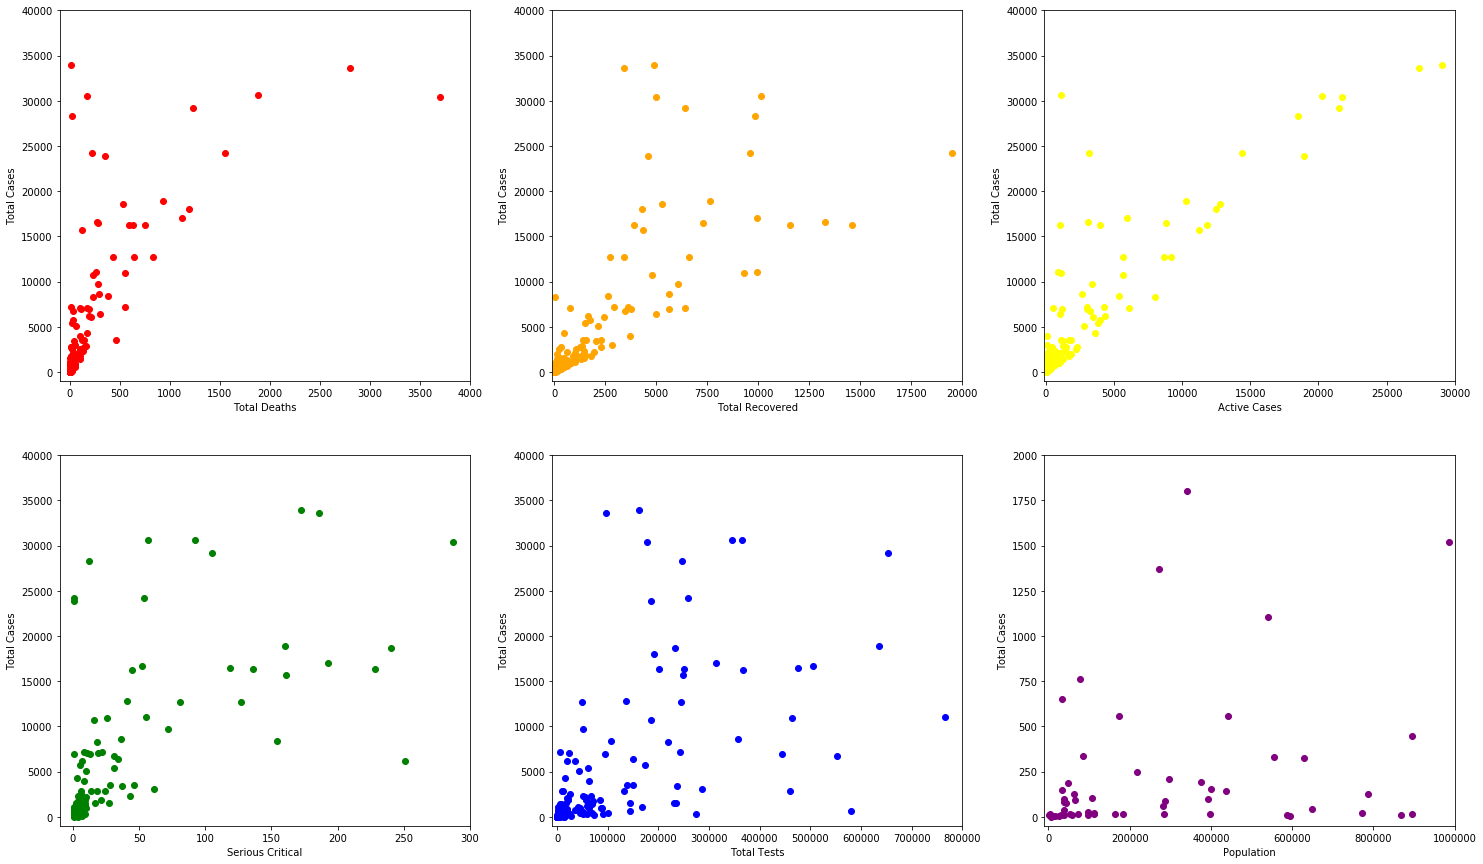

In [6]:
fig = plt.figure(figsize=(25,15))
y = covid['Total Cases']

# plotting scatter plot of Total Cases vs Total Deaths
x = covid['Total Deaths']
plt.subplot(2, 3, 1), plt.scatter(x, y, color='red')
plt.ylim(-1000,40000), plt.xlim(-100,4000)
plt.ylabel('Total Cases'), plt.xlabel('Total Deaths')

# plotting scatter plot of Total Cases vs Total Recovered
x = covid['Total Recovered']
plt.subplot(2, 3, 2), plt.scatter(x, y, color='orange')
plt.ylim(-1000,40000), plt.xlim(-100,20000)
plt.ylabel('Total Cases'), plt.xlabel('Total Recovered')

# plotting scatter plot of Total Cases vs Active Cases
x = covid['Active Cases']
plt.subplot(2, 3, 3), plt.scatter(x, y, color='yellow')
plt.ylim(-1000,40000), plt.xlim(-100,30000)
plt.ylabel('Total Cases'), plt.xlabel('Active Cases')

# plotting scatter plot of Total Cases vs Serious Critical 
x = covid["Serious Critical"]
plt.subplot(2, 3, 4), plt.scatter(x, y, color='green')
plt.ylim(-1000,40000), plt.xlim(-10,300)
plt.ylabel('Total Cases'), plt.xlabel('Serious Critical')

# plotting scatter plot of Total Cases vs Total Tests
x = covid["Total Tests"]
plt.subplot(2, 3, 5), plt.scatter(x, y, color='blue')
plt.ylim(-1000,40000) , plt.xlim(-10000,800000)
plt.ylabel('Total Cases'), plt.xlabel('Total Tests')

# plotting scatter plot of Total Cases vs Population
x = covid["Population"]
plt.subplot(2, 3, 6), plt.scatter(x, y, color='purple')
plt.ylim(-50,2000) , plt.xlim(-10000,1000000)
plt.ylabel('Total Cases'), plt.xlabel('Population')

plt.show()

Based on the scatter plots above, most of the scatter plots appear to have a somewhat linear relationship with the Total Cases attribute. The last two scatter plots, on the otherhand, which represent `Total Tests` vs `Total Cases` and `Population` vs `Total Cases` appaear to not have a visual linear relationship. However, that is simply an intuition and would require a further analysis before that claim could be definitively made. Therefore moving forward, I will be conducting linear regression models to analyze the different attributes with their correlation to `Total Cases`. 

To begin the analysis, I conducted six linear regressions in an effort to obtain coefficients for the various attributes as a predictor variable for `Total Cases`. The results are shown below:

In [7]:
#Regression Analysis For Total Deaths
x = covid['Total Deaths']
y = covid['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
total_death_slope = stats.linregress(x,y)

#Regression Analysis For Total Recovered
x = covid['Total Recovered']
y = covid['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
total_recovered_slope = stats.linregress(x,y)

#Regression Analysis For Active Cases
x = covid['Active Cases']
y = covid['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
active_cases_slope = stats.linregress(x,y)

#Regression Analysis For Serious Critical
x = covid['Serious Critical']
y = covid['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
serious_critical_slope = stats.linregress(x,y)

#Regression Analysis For Total Tests
x = covid['Total Tests']
y = covid['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
total_tests_slope = stats.linregress(x,y)

#Regression Analysis For Population
x = covid['Population']
y = covid['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
population_slope = stats.linregress(x,y)

As seen below, the `Total Deaths` Slope value and the `Serious Critical` Slope value have very large slope values of  approximately 14.03 and a whopping 81.45, which indicates that these attributes have a strong positive correlation with `Total Cases` per nation. Intuitively, this makes sense as one would expect as the number of deaths related to Covid-19 are increasing that the `Total Cases` are also increasing, with the same principle applying to that of `Serious Critical` cases. 

The `Total Recovered` and `Active Cases` Slopes have smaller slope values in comparison to the former two attributes, with values at 3.04 and 1.43 respectively. Similarly this indicates a positive correlation to `Total Cases` per nation, however the correlations are not as strong as the previous two were. I am a bit suprised that these slope values are not higher since I would expect that both `Active Cases` and `Total Recovered` are good indicators for the number of `Total Cases` per nation.




In [8]:
print("Total Deaths Slope Value:", total_death_slope[0])
print("Total Recovered Slope Value:", total_recovered_slope[0])
print("Active Cases Slope Value:", active_cases_slope[0])
print("Serious Critical Slope Value:", serious_critical_slope[0])
print("Total Tests Slope Value:", total_tests_slope[0])
print("Population Slope Value:", population_slope[0])

Total Deaths Slope Value: 14.02789761014072
Total Recovered Slope Value: 3.0384290128278018
Active Cases Slope Value: 1.4290855186360016
Serious Critical Slope Value: 81.449463208273
Total Tests Slope Value: 0.09874065154271522
Population Slope Value: 0.00033169302204423047


The last two attributes `Total Tests` and `Population` have very small slope values with Total Tests at 0.0987 and Population at 0.0003. Since these slope values are extremely close to 0, this indicates that there is no relationship between these attributes and `Total Cases`. This is interesting since I expected that the number of Total Tests would correlate with `Total Cases` since you need tests to diagnose cases of Covid-19. I also thought that Population size might also be correlated with `Total Cases` since the more populated a nation is the more opportunities there are of people getting Covid-19 infections. 

These regression slope values naturally lead me to the question: Will grouping countries by their relative Global Health Index preparedness categories influence these correlations? For example, it appears here that there is no correlation between `Population` and `Total Cases`, but will that change based on our three preparedness categories? We will explore this question further in the next section.

#### Section 2: Covid -19 Dataset Grouped by Most Prepared Global Health Index

The first preparedness category we will be analyzing is the Most Prepared category. Countries that are a part of this category have a Global Health Security Index between 100-66.7 which indicates that they are the best equipped to handle changes in national health security based on various factors such as the nation's healthcare infrastructure. The overall score is computed as a weighted sum of the following category scores:

    1) PREVENTION OF THE EMERGENCE OR RELEASE OF PATHOGENS (16.3%)
    2) EARLY DETECTION & REPORTING EPIDEMICS OF POTENTIAL INTERNATIONAL CONCERN (19.2%)
    3) RAPID RESPONSE TO AND MITIGATION OF THE SPREAD OF AN EPIDEMIC  (19.2%)
    4) SUFFICIENT & ROBUST HEALTH SECTOR TO TREAT THE SICK & PROTECT HEALTH WORKERS (16.7%)
    5) COMMITMENTS TO IMPROVING NATIONAL CAPACITY, FINANCING AND ADHERENCE TO NORMS (15.8%)
    6) OVERALL RISK ENVIRONMENT AND COUNTRY VULNERABILITY TO BIOLOGICAL THREATS (12.8%)

This index for each instance is computed by the Global Health Security organization. 

In [9]:
abbreviations = {'USA':"United States", 'UK': "United Kingdom", 'UAE':"United Arab Emirates", 
                 "S. Korea":"South Korea", "DRC":"Congo (Democratic Republic)", "CAR":"Central African Republic" }

In [10]:
#Indexing Covid-19 dataset to create Most Prepared Grouping
most_prepared = health_str['GHS Index'] >=66.7
most_prepared = health_str[most_prepared]
new_lis = { v:k for k,v in abbreviations.items()}
countries = [new_lis.get(item,item)  for item in most_prepared['Country'].values]
GHS_1 = covid[covid['Country'].isin(countries)]

GHS_1.head()

Country  Total Cases  New Cases  Total Deaths  New Deaths  \
0           USA    1550294.0        NaN       91981.0         NaN   
4            UK     246406.0        NaN       34796.0         NaN   
6        France     179927.0        NaN       28239.0         NaN   
12       Canada      78072.0        NaN        5842.0         NaN   
17  Netherlands      44141.0        NaN        5694.0         NaN   

    Total Recovered  Active Cases  Serious Critical  Total Cases/ 1M Pop  \
0          356383.0     1101930.0           16868.0               4687.0   
4               NaN           NaN            1559.0               3632.0   
6           61728.0       89960.0            1998.0               2757.0   
12          39228.0       33002.0             502.0               2071.0   
17              NaN           NaN             323.0               2577.0   

    Death/ 1M Pop  Total Tests  Tests/ 1M Pop   Population  
0           278.0   12300744.0        37188.0  330774664.0  
4           513.0    2682716.0        39542.0   67844241.0  
6           433.0    1384633.0        21218.0   65256826.0  
12          155.0    1323371.0        35100.0   37702769.0  
17          332.0     297347.0        17358.0   17130492.0

This Most Prepared category (based on GHS Index) is very small with only 13 nations having an index larger than 66.7, which is the minimum GHS Index required to be placed in the category. In an effort to visual the data of this category, I have created a bar graph below to represent the distribution of the data relative to the nation.

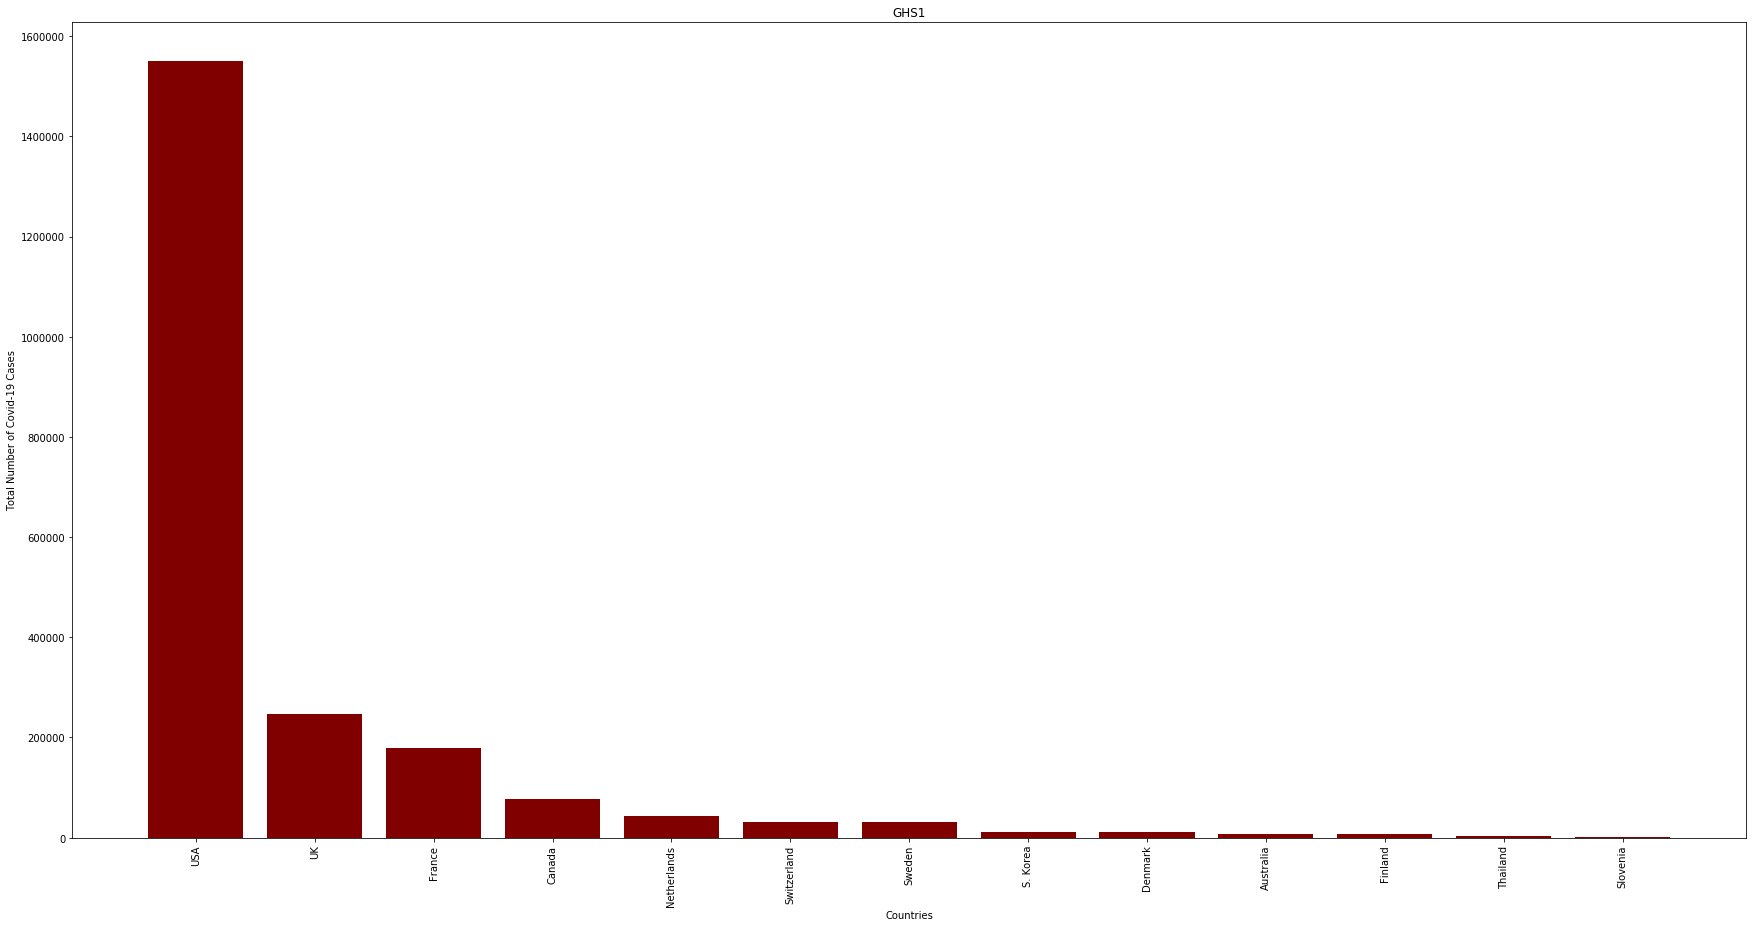

In [11]:
# Visualization of Most Prepared Category
fig = plt.figure(figsize=(30,15))
y = GHS_1["Country"].values
x = GHS_1["Total Cases"].values

plt.bar(y,x, color="maroon")
plt.xticks(rotation=90)
plt.title("GHS1")
plt.xlabel("Countries")
plt.ylabel("Total Number of Covid-19 Cases")
plt.show()

In [12]:
print("Mean:", round(GHS_1['Total Cases'].mean(),1))
print("STD:", round(GHS_1['Total Cases'].std(),1))

Mean: 169215.9
STD: 421752.9


The average number of Covid-19 cases within this category is 169215.9 cases, which is much larger than the mean of the entire Covid-19 dataset. The standard deviation is 421752.9 which is an extremely large value, indicating that there is great variablility in the data. This is also visually evident from the bar plot since the Unites States seems to be a large outlier, which influences both the mean and standard deviation greatly.  

This is quite suprising since I would expect that nations who fall into this category would have a lower average of `Total Cases`  since they are the Most Prepared to handle changes in national health security compared to other nations.


The data analysis below will investigate our six attributes in comparison to the `Total Cases` in order to determine if grouping nations by Global Health Security Index preparedness will influence the correlations.

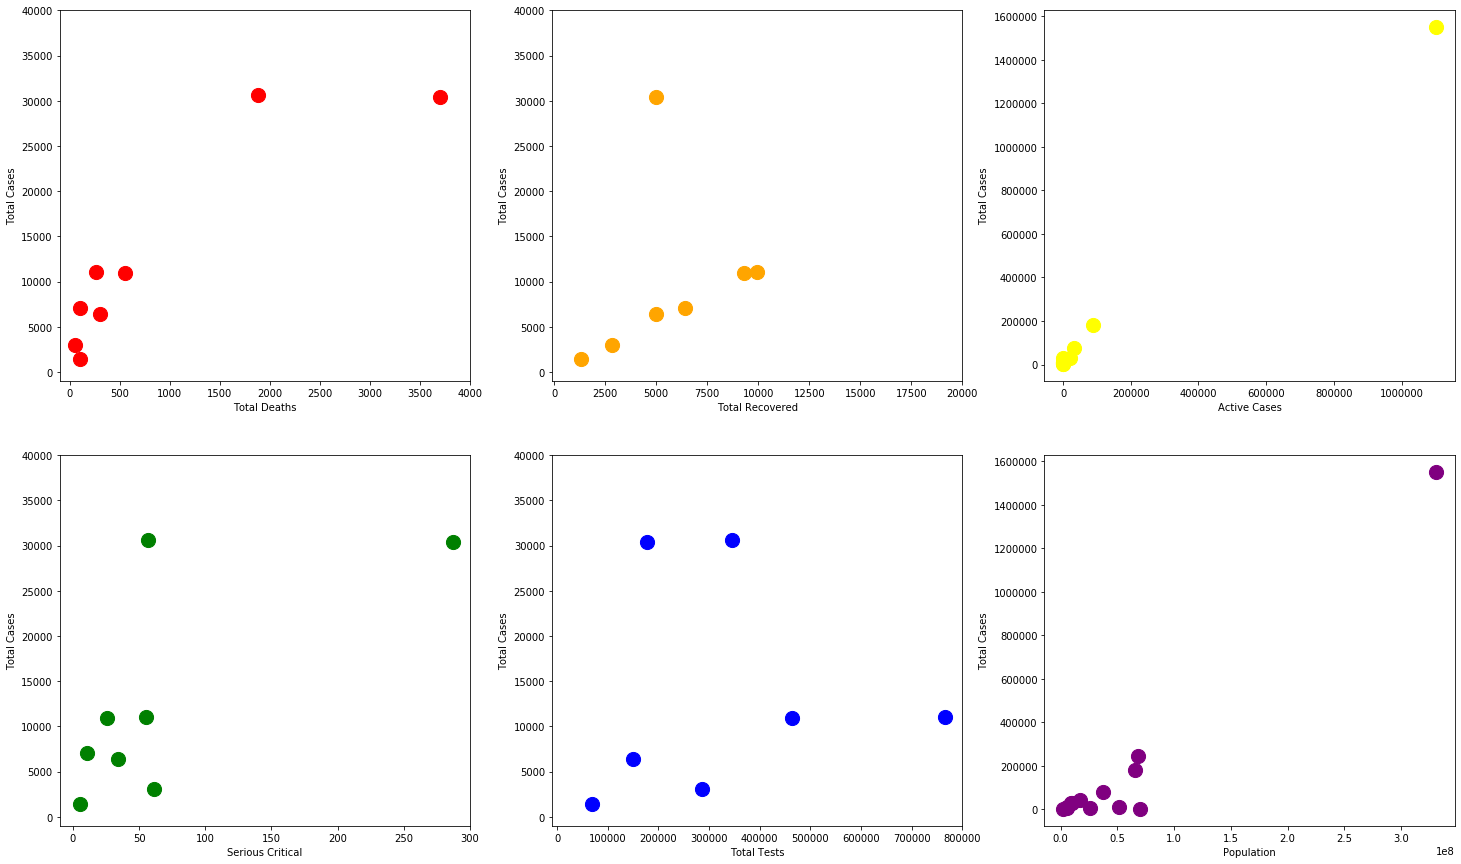

In [13]:
fig = plt.figure(figsize=(25,15))
y = GHS_1['Total Cases']

# plotting scatter plot of Total Cases vs Total Deaths
x = GHS_1['Total Deaths']
plt.subplot(2, 3, 1), plt.scatter(x, y, color='red', s=200)
plt.ylim(-1000,40000), plt.xlim(-100,4000)
plt.ylabel('Total Cases'), plt.xlabel('Total Deaths')

# plotting scatter plot of Total Cases vs Total Recovered
x = GHS_1['Total Recovered']
plt.subplot(2, 3, 2), plt.scatter(x, y, color='orange', s=200)
plt.ylim(-1000,40000), plt.xlim(-100,20000)
plt.ylabel('Total Cases'), plt.xlabel('Total Recovered')

# plotting scatter plot of Total Cases vs Active Cases
x = GHS_1['Active Cases']
plt.subplot(2, 3, 3), plt.scatter(x, y, color='yellow', s=200)
plt.ylabel('Total Cases'), plt.xlabel('Active Cases')

# plotting scatter plot of Total Cases vs Serious Critical 
x = GHS_1["Serious Critical"]
plt.subplot(2, 3, 4), plt.scatter(x, y, color='green', s=200)
plt.ylim(-1000,40000), plt.xlim(-10,300)
plt.ylabel('Total Cases'), plt.xlabel('Serious Critical')

# plotting scatter plot of Total Cases vs Total Tests
x = GHS_1["Total Tests"]
plt.subplot(2, 3, 5), plt.scatter(x, y, color='blue', s=200)
plt.ylim(-1000,40000) , plt.xlim(-10000,800000)
plt.ylabel('Total Cases'), plt.xlabel('Total Tests')

# plotting scatter plot of Total Cases vs Population
x = GHS_1["Population"]
plt.subplot(2, 3, 6), plt.scatter(x, y, color='purple', s=200)
plt.ylabel('Total Cases'), plt.xlabel('Population')
plt.show()

Based on the scatter plots above, every plot appears to have a somewhat linear relationship with the `Total Cases` attribute. The only plot that may not have a correlation with `Total Cases` may be the `Serious Critical` attribute. However, I will be conducting a linear regression models to deterimine if these attributes may be used as predictor variable for `Total Cases`. The results are shown below:

In [14]:
#Regression Analysis For Total Deaths
x = GHS_1['Total Deaths']
y = GHS_1['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH1_total_death_slope = stats.linregress(x,y)

#Regression Analysis For Total Recovered
x = GHS_1['Total Recovered']
y = GHS_1['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH1_total_recovered_slope = stats.linregress(x,y)

#Regression Analysis For Active Cases
x = GHS_1['Active Cases']
y = GHS_1['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH1_active_cases_slope = stats.linregress(x,y)

#Regression Analysis For Serious Critical
x = GHS_1['Serious Critical']
y = GHS_1['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH1_serious_critical_slope = stats.linregress(x,y)

#Regression Analysis For Total Tests
x = GHS_1['Total Tests']
y = GHS_1['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH1_total_tests_slope = stats.linregress(x,y)

#Regression Analysis For Population
x = GHS_1['Population']
y = GHS_1['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH1_population_slope = stats.linregress(x,y)

The results of this linear regression (shown below) is quite similar to that of the entire Covid-19 dataset. Similarly, the `Total Deaths` and the `Serious Critical` attributes are strongly positively correlated with very large slope values of 15.51 and 91.30 respectively. 

Likewise, the `Total Recovered` and `Active Cases` Slopes values are also smaller in comparison to the `Total Deaths` and the `Serious Critical` attributes with slopes of 4.400 and 1.396, which also indicate postive correlations between the attributes and `Total Cases`

In [15]:
print("Total Deaths Slope Value:", GSH1_total_death_slope[0])
print("Total Recovered Slope Value:", GSH1_total_recovered_slope[0])
print("Active Cases Slope Value:", GSH1_active_cases_slope[0])
print("Serious Critical Slope Value:", GSH1_serious_critical_slope[0])
print("Total Tests Slope Value:", GSH1_total_tests_slope[0])
print("Population Slope Value:", GSH1_population_slope[0])

Total Deaths Slope Value: 15.512703730168758
Total Recovered Slope Value: 4.400396255564396
Active Cases Slope Value: 1.3967194805720684
Serious Critical Slope Value: 91.30416341604172
Total Tests Slope Value: 0.12761498586473066
Population Slope Value: 0.004711269623957201


The last two attributes `Total Tests` and `Population` also follow the same trends as the previous regression analysis of the entire Covid-19 dataset. Both these attributes had extremely small slope values in comparison to the other attributes with `Total Tests` having a slope of about 0.128 and 0.005. Low slope values such as these indicate that there is either no linear relationship or a very weak relationship between the attributes. 

With this regression analysis, every attribute with the exception `Active Cases`, had slope values that increased. While `Active Cases` still had a moderately postive correlation with `Total Cases`, the slope value decreased by about 0.032. This decrease is quite interesting and means that `Active Cases` in nations that are most prepared for health crises (based on Global Health Security Index) is less of a determining factor than in the entire world. 

#### Section 3: Covid -19 Dataset Grouped by More Prepared Global Health Index

The second preparedness category we will be analyzing is the More Prepared category. Countries that are a part of this category have a Global Health Security Index between 33.4-66.6. This indicates that they are more equipped to handle changes in national health security than other nations but are not the best equipped.

In [16]:
#Indexing Covid-19 dataset to create More Prepared Grouping
con_1 = health_str['GHS Index'] <=66.6 
con_2 = health_str['GHS Index']>= 33.4
more_prepared = health_str[con_1 & con_2]
new_lis = { v:k for k,v in abbreviations.items()}
countries = [new_lis.get(item,item)  for item in more_prepared['Country'].values]
GHS_2 = covid[covid['Country'].isin(countries)]

GHS_2.head()

Country  Total Cases  New Cases  Total Deaths  New Deaths  Total Recovered  \
1   Russia     290678.0        NaN        2722.0         NaN          70209.0   
2    Spain     278188.0        NaN       27709.0         NaN         196958.0   
3   Brazil     255368.0        NaN       16853.0         NaN         100459.0   
5    Italy     225886.0        NaN       32007.0         NaN         127326.0   
7  Germany     177289.0        NaN        8123.0         NaN         155700.0   

   Active Cases  Serious Critical  Total Cases/ 1M Pop  Death/ 1M Pop  \
1      217747.0            2300.0               1992.0           19.0   
2       53521.0            1152.0               5950.0          593.0   
3      138056.0            8318.0               1202.0           79.0   
5       66553.0             749.0               3735.0          529.0   
7       13466.0            1133.0               2117.0           97.0   

   Total Tests  Tests/ 1M Pop   Population  
1    7147014.0        48977.0  145927292.0  
2    3037840.0        64977.0   46752703.0  
3     735224.0         3462.0  212380932.0  
5    3041366.0        50294.0   60471924.0  
7    3147771.0        37584.0   83752855.0

The More Prepared category (based on GHS Index) is much larger than the Most Prepared category with about 104 nations falling into this category. In an effort to visual the data of this category, I have created a bar graph below to represent the distribution of the data relative to the nations.

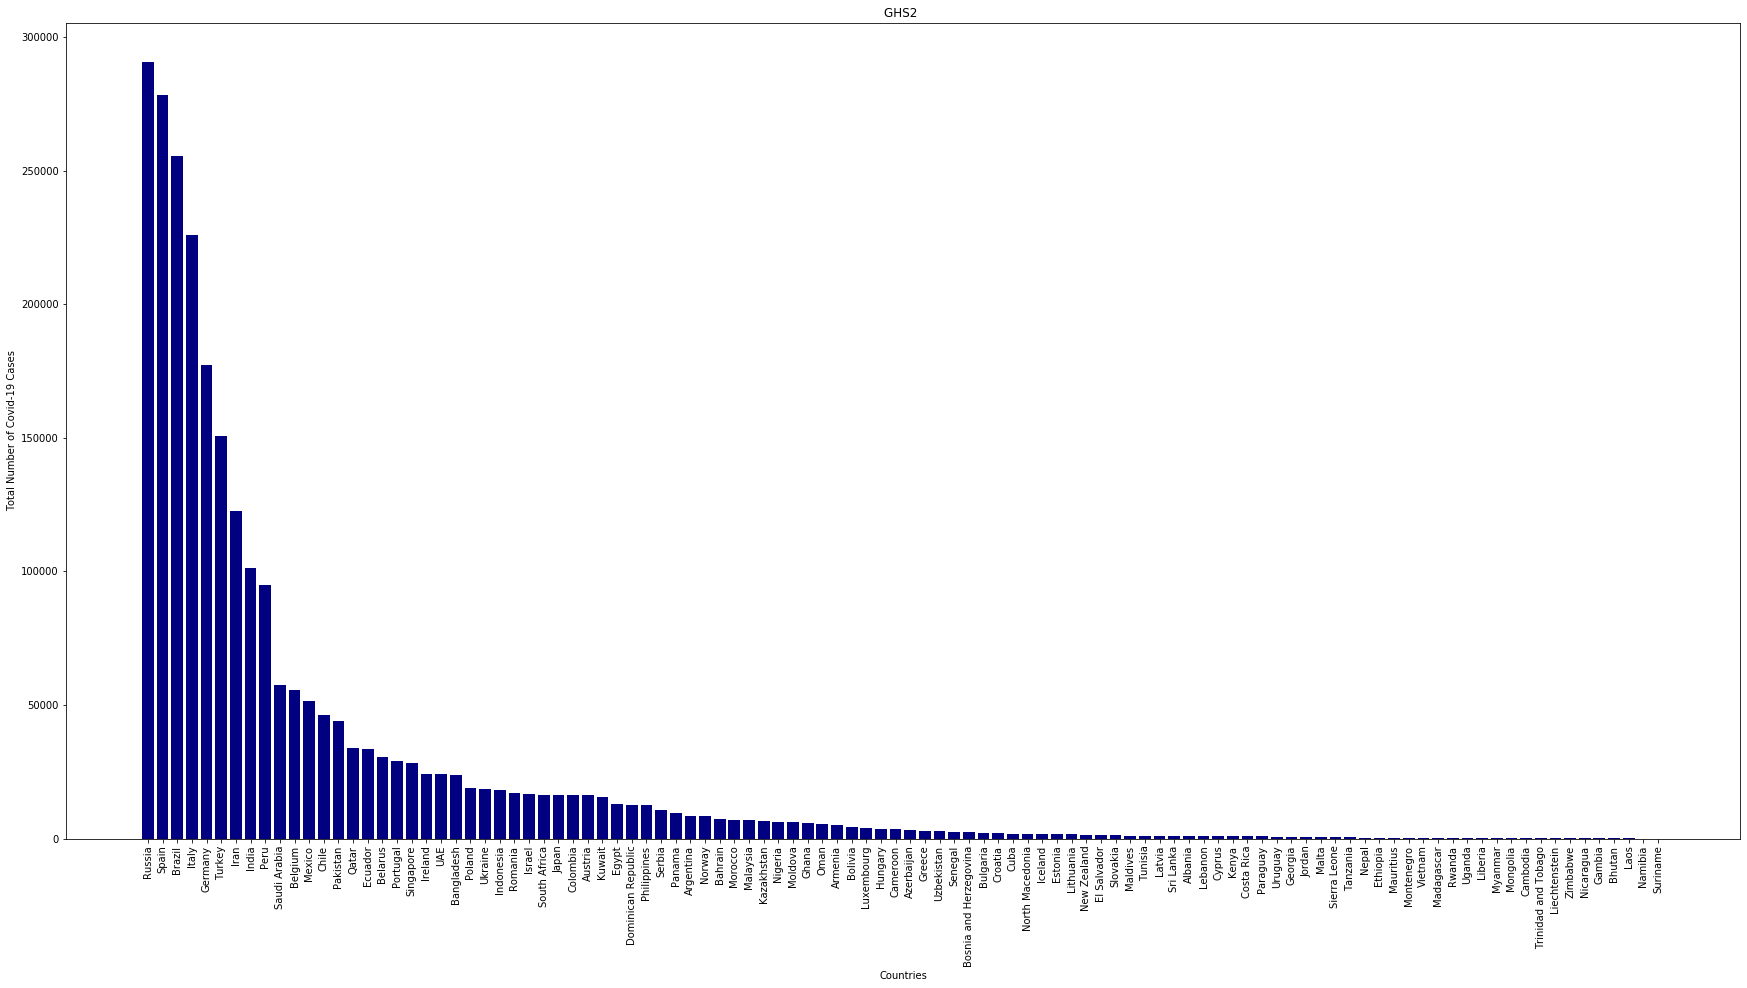

In [17]:
# Visualization of Most Prepared Category

fig = plt.figure(figsize=(30,15))
y = GHS_2["Country"].values
x = GHS_2["Total Cases"].values

plt.bar(y,x, color="navy")
plt.xticks(rotation=90)
plt.title("GHS2 ")
plt.xlabel("Countries")
plt.ylabel("Total Number of Covid-19 Cases")
plt.show()

In [18]:
print("Mean:", round(GHS_2['Total Cases'].mean(),1))
print("STD:", round(GHS_2['Total Cases'].std(),1))

Mean: 24468.2
STD: 56447.0


The average number of Covid-19 cases within this category is 24468.2 cases. This is about the same as the entire Covid-19 dataset, which had a mean of 22484.2 cases. However the standard devation of this cateogy is about half the size of the standard deviation of the entire Covid-19 dataset. 

The data analysis below will investigate our six attributes in comparison to the `Total Cases` in order to determine if grouping nations by Global Health Security Index preparedness will influence the correlations.

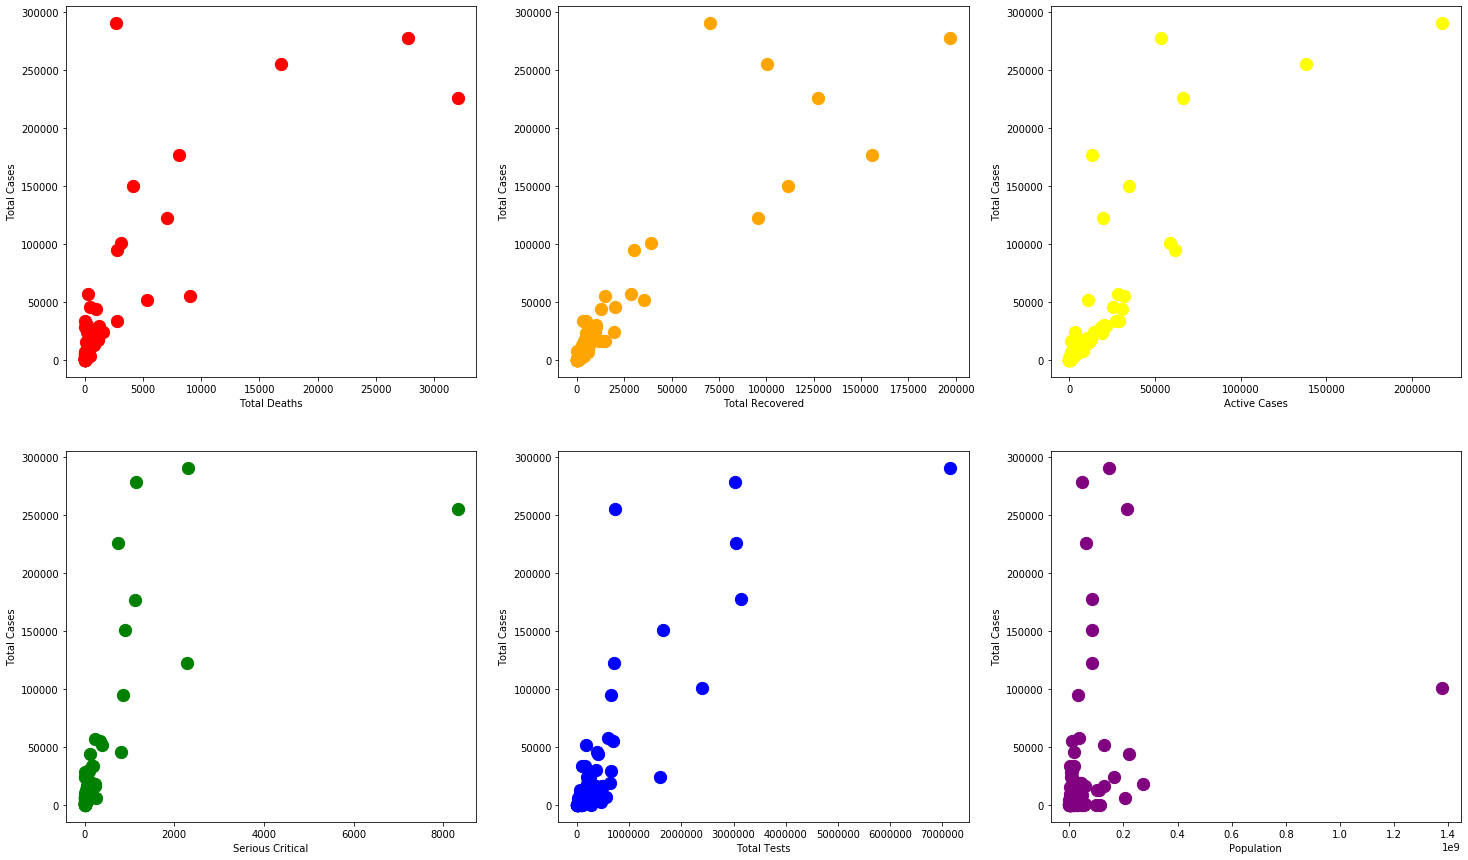

In [19]:
fig = plt.figure(figsize=(25,15))
y = GHS_2['Total Cases']

# plotting scatter plot of Total Cases vs Total Deaths
x = GHS_2['Total Deaths']
plt.subplot(2, 3, 1), plt.scatter(x, y, color='red', s=150)
plt.ylabel('Total Cases'), plt.xlabel('Total Deaths')

# plotting scatter plot of Total Cases vs Total Recovered
x = GHS_2['Total Recovered']
plt.subplot(2, 3, 2), plt.scatter(x, y, color='orange', s=150)
plt.ylabel('Total Cases'), plt.xlabel('Total Recovered')

# plotting scatter plot of Total Cases vs Active Cases
x = GHS_2['Active Cases']
plt.subplot(2, 3, 3), plt.scatter(x, y, color='yellow', s=150)
plt.ylabel('Total Cases'), plt.xlabel('Active Cases')

# plotting scatter plot of Total Cases vs Serious Critical 
x = GHS_2["Serious Critical"]
plt.subplot(2, 3, 4), plt.scatter(x, y, color='green', s=150)
plt.ylabel('Total Cases'), plt.xlabel('Serious Critical')

# plotting scatter plot of Total Cases vs Total Tests
x = GHS_2["Total Tests"]
plt.subplot(2, 3, 5), plt.scatter(x, y, color='blue', s=150)
plt.ylabel('Total Cases'), plt.xlabel('Total Tests')

# plotting scatter plot of Total Cases vs Population
x = GHS_2["Population"]
plt.subplot(2, 3, 6), plt.scatter(x, y, color='purple', s=150)
plt.ylabel('Total Cases'), plt.xlabel('Population')
plt.show()

Based on the scatter plots above, most plots appear to have a somewhat linear relationship with the `Total Cases` attribute. The only plot that may not have a correlation with `Total Cases` may be the `Population` attribute. However, I will be conducting a linear regression models to deterimine if these attributes may be used as predictor variable for `Total Cases`. The results are shown below:

In [20]:
#Regression Analysis For Total Deaths
x = GHS_2['Total Deaths']
y = GHS_2['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH2_total_death_slope = stats.linregress(x,y)

#Regression Analysis For Total Recovered
x = GHS_2['Total Recovered']
y = GHS_2['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH2_total_recovered_slope = stats.linregress(x,y)

#Regression Analysis For Active Cases
x = GHS_2['Active Cases']
y = GHS_2['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH2_active_cases_slope = stats.linregress(x,y)

#Regression Analysis For Serious Critical
x = GHS_2['Serious Critical']
y = GHS_2['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH2_serious_critical_slope = stats.linregress(x,y)

#Regression Analysis For Total Tests
x = GHS_2['Total Tests']
y = GHS_2['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH2_total_tests_slope = stats.linregress(x,y)

#Regression Analysis For Population
x = GHS_2['Population']
y = GHS_2['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH2_population_slope = stats.linregress(x,y)

The results of this linear regression are quite interesting. Similar to the previous two Linear regressions, the `Total Deaths` and `Serious Critical` attributes have a very strong positive correlation with large slope values of 9.735 and 43.47. 

Likewise, the `Total Recovered` and `Active Cases` Slopes values are also smaller in comparison to the `Total Deaths` and the `Serious Critical` attributes with slopes of 1.59 and 1.72, which also indicates postive correlations between the attributes and `Total Cases`.

In [21]:
print("Total Deaths Slope Value:", GSH2_total_death_slope[0])
print("Total Recovered Slope Value:", GSH2_total_recovered_slope[0])
print("Active Cases Slope Value:", GSH2_active_cases_slope[0])
print("Serious Critical Slope Value:", GSH2_serious_critical_slope[0])
print("Total Tests Slope Value:", GSH2_total_tests_slope[0])
print("Population Slope Value:", GSH2_population_slope[0])

Total Deaths Slope Value: 9.735322668368408
Total Recovered Slope Value: 1.592101478025057
Active Cases Slope Value: 1.7248904311903528
Serious Critical Slope Value: 43.47841663697322
Total Tests Slope Value: 0.05260161324797589
Population Slope Value: 0.0001100136315020302


The last two attributes `Total Tests` and `Population` also follow the same trends as the previous regression analysis of the entire Covid-19 dataset. Both these attributes had extremely small slope values in comparison to the other attributes with `Total Tests` having a slopes of about 0.052 and 0.0001, indicating that there is essentially no linear relationship between the attributes. 

With this regression analysis, every attribute with the exception `Active Cases`, had slope values that decreased quite significantly compared to both the entire Covid-19 dataset and the More prepared data category. The slope of `Active Cases` actually increased compared to both datasets, which can be interpreted as `Active Cases` in nations that are more prepared for health crises (based on Global Health Security Index) is more of a determining factor than in the entire world and even in nations that are the best prepared for crises. 

#### Section 4: Covid -19 Dataset Grouped by Least Prepared Global Health Index

The third preparedness category we will be analyzing is the Least Prepared category. Countries that are a part of this category have a Global Health Security Index between 0-33.3. This indicates that they are the least equipped to handle changes in national health security compared to other nations.

In [22]:
#Least Prepared Group
least_prepared = health_str['GHS Index'] <=33.3
least_prepared = health_str[least_prepared]
new_lis = { v:k for k,v in abbreviations.items()}
countries = [new_lis.get(item,item)  for item in least_prepared['Country'].values]
GHS_3 = covid[covid['Country'].isin(countries)]

GHS_3.head()

Country  Total Cases  New Cases  Total Deaths  New Deaths  \
49      Algeria       7201.0        NaN         555.0         NaN   
51  Afghanistan       7072.0        NaN         173.0         NaN   
65         Iraq       3554.0        NaN         127.0         NaN   
71     Honduras       2798.0      152.0         146.0         4.0   
72       Guinea       2796.0        NaN          16.0         NaN   

    Total Recovered  Active Cases  Serious Critical  Total Cases/ 1M Pop  \
49           3625.0        3021.0              22.0                165.0   
51            801.0        6098.0              19.0                182.0   
65           2310.0        1117.0               NaN                 89.0   
71            340.0        2312.0              14.0                283.0   
72           1263.0        1517.0              18.0                214.0   

    Death/ 1M Pop  Total Tests  Tests/ 1M Pop  Population  
49           13.0       6500.0          149.0  43752773.0  
51            4.0      23497.0          605.0  38817349.0  
65            3.0     149701.0         3732.0  40108260.0  
71           15.0      10775.0         1090.0   9885245.0  
72            1.0      10304.0          787.0  13086759.0

The Least Prepared category (based on GHS Index) is much larger than the Most Prepared category, however it is about half the size of the More Prepared category with 53 nations falling into this category. In an effort to visual the data of this category, I have created a bar graph below to represent the distribution of the data relative to the nations.

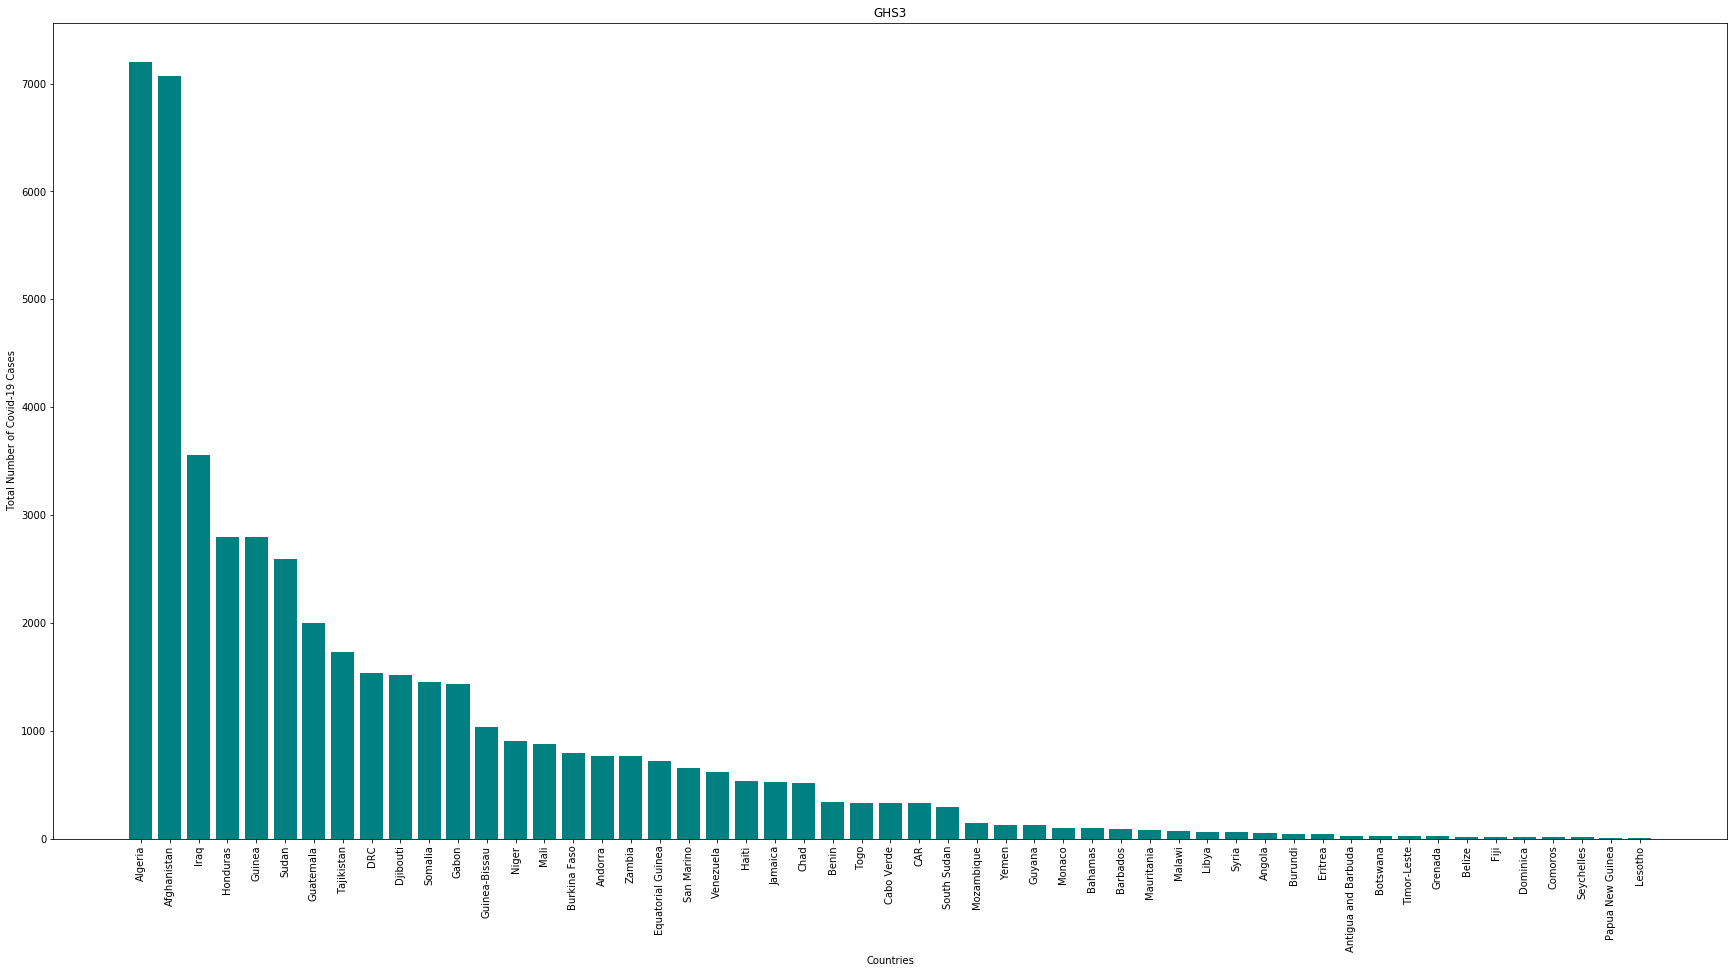

In [23]:
# Visualization of Most Prepared Category
fig = plt.figure(figsize=(30,15))
y = GHS_3["Country"].values
x = GHS_3["Total Cases"].values

plt.bar(y,x, color="teal")
plt.xticks(rotation=90)
plt.title("GHS3")
plt.xlabel("Countries")
plt.ylabel("Total Number of Covid-19 Cases")
plt.show()

In [24]:
print("Mean:", round(GHS_3['Total Cases'].mean(),1))
print("STD:", round(GHS_3['Total Cases'].std(),1))

Mean: 891.7
STD: 1505.0


The average number of Covid-19 cases within this category is 891.7 cases. This is extremely low compared to the other three dataset averages. The standard deviation is also much smaller than the other datasets indicating that there is less variablity in the data. 

This is interesting since I would expect that nations who fall into this category would have a higher average since they are Least Prepared to handle changes in national health security compared to other nations.

The data analysis below will investigate our six attributes in comparison to the `Total Cases` in order to determine if grouping nations by Global Health Security Index preparedness will influence the correlations.

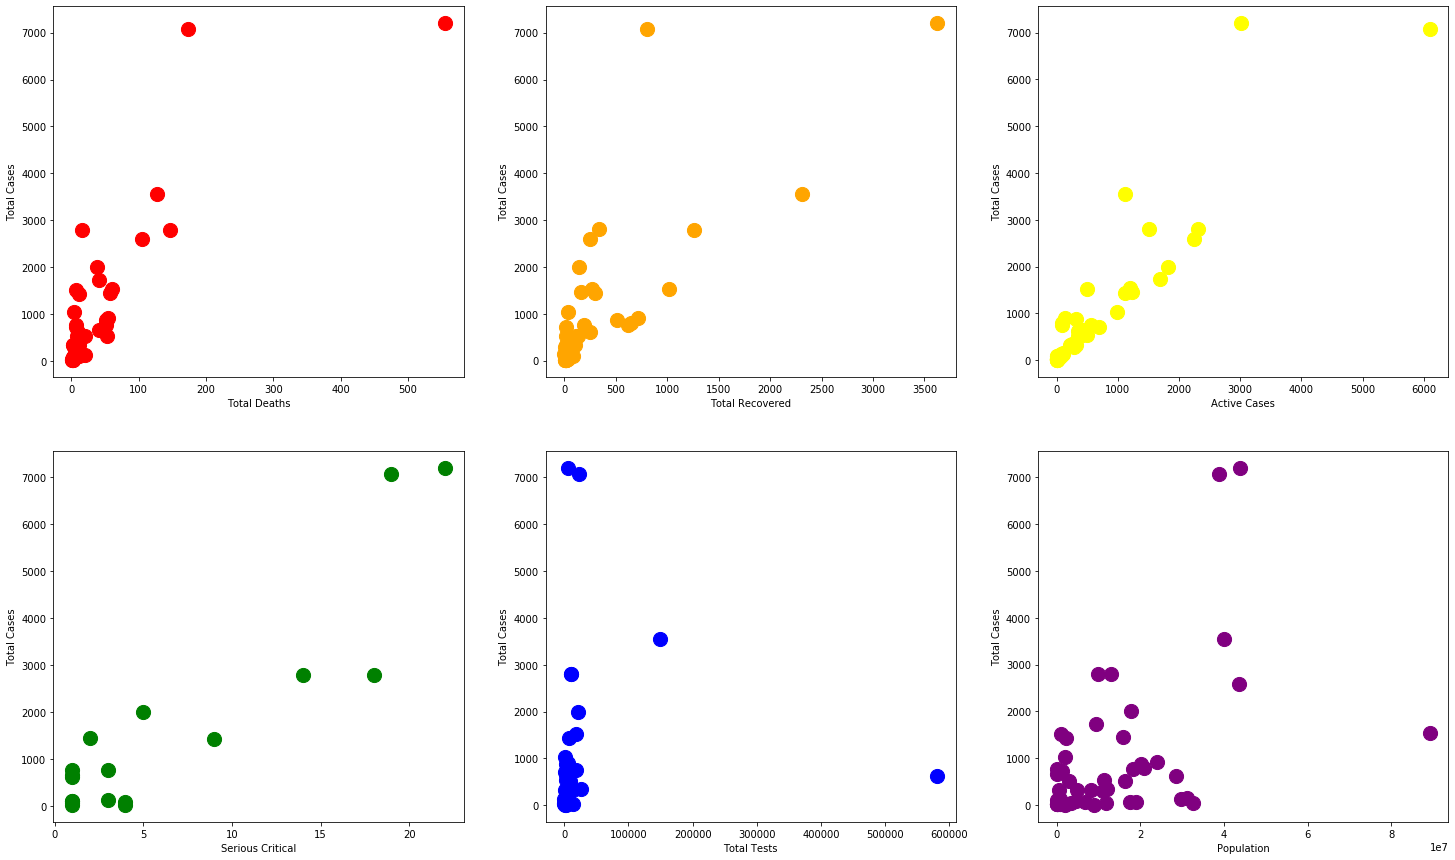

In [25]:
fig = plt.figure(figsize=(25,15))
y = GHS_3['Total Cases']

# plotting scatter plot of Total Cases vs Total Deaths
x = GHS_3['Total Deaths']
plt.subplot(2, 3, 1), plt.scatter(x, y, color='red', s=200)
plt.ylabel('Total Cases'), plt.xlabel('Total Deaths')

# plotting scatter plot of Total Cases vs Total Recovered
x = GHS_3['Total Recovered']
plt.subplot(2, 3, 2), plt.scatter(x, y, color='orange', s=200)
plt.ylabel('Total Cases'), plt.xlabel('Total Recovered')

# plotting scatter plot of Total Cases vs Active Cases
x = GHS_3['Active Cases']
plt.subplot(2, 3, 3), plt.scatter(x, y, color='yellow', s=200)
plt.ylabel('Total Cases'), plt.xlabel('Active Cases')

# plotting scatter plot of Total Cases vs Serious Critical 
x = GHS_3["Serious Critical"]
plt.subplot(2, 3, 4), plt.scatter(x, y, color='green', s=200)
plt.ylabel('Total Cases'), plt.xlabel('Serious Critical')

# plotting scatter plot of Total Cases vs Total Tests
x = GHS_3["Total Tests"]
plt.subplot(2, 3, 5), plt.scatter(x, y, color='blue', s=200)
plt.ylabel('Total Cases'), plt.xlabel('Total Tests')

# plotting scatter plot of Total Cases vs Population
x = GHS_3["Population"]
plt.subplot(2, 3, 6), plt.scatter(x, y, color='purple', s=200)
plt.ylabel('Total Cases'), plt.xlabel('Population')
plt.show()

Based on the scatter plots above, most plots appear to have a somewhat linear relationship with the `Total Cases` attribute. The only plot that may not have a correlation with `Total Cases` may be the `Total Tests` attribute. Therefore to further analyze this data, I will conduct linear regression models to deterimine if these attributes may be used as predictor variable for `Total Cases`. The results are shown below:

In [26]:
#Regression Analysis For Total Deaths
x = GHS_3['Total Deaths']
y = GHS_3['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH3_total_death_slope = stats.linregress(x,y)

#Regression Analysis For Total Recovered
x = GHS_3['Total Recovered']
y = GHS_3['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH3_total_recovered_slope = stats.linregress(x,y)

#Regression Analysis For Active Cases
x = GHS_3['Active Cases']
y = GHS_3['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH3_active_cases_slope = stats.linregress(x,y)

#Regression Analysis For Serious Critical
x = GHS_3['Serious Critical']
y = GHS_3['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH3_serious_critical_slope = stats.linregress(x,y)

#Regression Analysis For Total Tests
x = GHS_3['Total Tests']
y = GHS_3['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH3_total_tests_slope = stats.linregress(x,y)

#Regression Analysis For Population
x = GHS_3['Population']
y = GHS_3['Total Cases']
y=y[np.logical_not(np.isnan(x))]
x=x[np.logical_not(np.isnan(x))]
GSH3_population_slope = stats.linregress(x,y)

The results of this linear regression are quite interesting as attributes resemble different models. The `Serious Critical` attribute has an extremely strong postive correlation with `Total Cases` since it has a large slope value of 281.426. This is about three times greater than the slopes of the most prepared category, which indicates that `Serious Critical` is a very important indicator for the `Total Cases` attribute. 

The `Total Deaths`, `Total Recovered` , and `Active Cases` slope values are also positve with respective values of 14.978, 1.916, and 1.3276. These values will be compared further in the next section. 

In [27]:
print("Total Deaths Slope Value:", GSH3_total_death_slope[0])
print("Total Recovered Slope Value:", GSH3_total_recovered_slope[0])
print("Active Cases Slope Value:", GSH3_active_cases_slope[0])
print("Serious Critical Slope Value:", GSH3_serious_critical_slope[0])
print("Total Tests Slope Value:", GSH3_total_tests_slope[0])
print("Population Slope Value:", GSH3_population_slope[0])

Total Deaths Slope Value: 14.97819634047133
Total Recovered Slope Value: 1.9166731239463488
Active Cases Slope Value: 1.3276562952568136
Serious Critical Slope Value: 281.4262083225641
Total Tests Slope Value: 0.0011337277529965752
Population Slope Value: 4.556809054168844e-05


The last two attributes `Total Tests` and `Population`  follow the same trends as all the above regression analyses with extremely small slope values of 0.0011 and 4.556e-05, indicating virtually no linear relationship between the attributes and `Total Cases`. Further comparisons of this regression analysis will be reported more in-depth in the next section.

#### Section 5: Comparison of Results

This section will compare the results of the four sets of Linear Regression analyses that were conducted in the previous sections. In order to determine which dataset is the best indicator for prediciting `Total Cases` depending on the attribute. Bar graphs of each categories respective Regression Slope Values based on attributes are reported below.

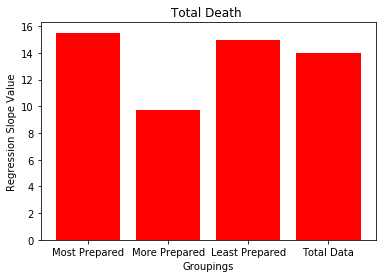

In [28]:
#Total Death Regression Plot
y = ["Most Prepared","More Prepared", "Least Prepared", "Total Data"]
x = [ GSH1_total_death_slope[0], GSH2_total_death_slope[0], GSH3_total_death_slope[0], total_death_slope[0]]
plt.bar(y,x, color="red")
plt.title("Total Death ")
plt.xlabel("Groupings")
plt.ylabel("Regression Slope Value")
plt.show()

The regression slope values of the `Total Deaths` attribute appears to be quite uniform, with the exception of the More Prepared cateogry that has a much lower regression slope compared to the other categories. This indicates that the `Total Deaths` attribute is not as good in predicting `Total Cases` than the other models are. Overall the large regression slope values indicate that all of the categories will have a strong postive correlation with `Total Cases`.

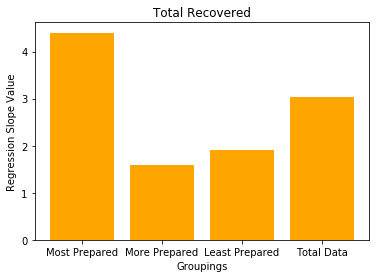

In [29]:
x = [GSH1_total_recovered_slope[0], GSH2_total_recovered_slope[0], GSH3_total_recovered_slope[0], total_recovered_slope[0]]
plt.bar(y,x, color="orange")
plt.title("Total Recovered")
plt.xlabel("Groupings")
plt.ylabel("Regression Slope Value")
plt.show()

The regression slope values of the `Total Recovered` attribute appears to have much more variability than `Total Deaths` attribute. The Most Prepared cateogry has the largest regression slope compared to the other categories. Which indicates that the `Total Recovered` attribute is better equipped to predict `Total Cases` than the other models are. Overall since the slope values are postive, that indicates that all of the categories will have a postive correlation with `Total Cases`.

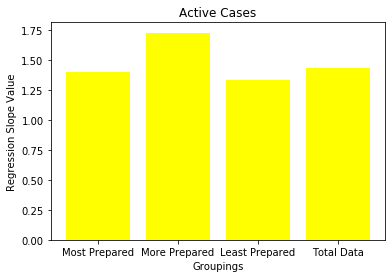

In [30]:
x = [GSH1_active_cases_slope[0], GSH2_active_cases_slope[0], GSH3_active_cases_slope[0], active_cases_slope[0]]
plt.bar(y,x, color="yellow")
plt.title("Active Cases")
plt.xlabel("Groupings")
plt.ylabel("Regression Slope Value")
plt.show()

The regression slope values of the `Active Cases` attribute appears to be quite uniform, with the More Prepared cateogry having a slightly larger regression slope compared to the other categories. This indicates that the `Active Cases` attribute predicts `Total Cases` better than the other models. Overall the postive regression slope values indicate that all of the categories will have a positive correlation with `Total Cases`.

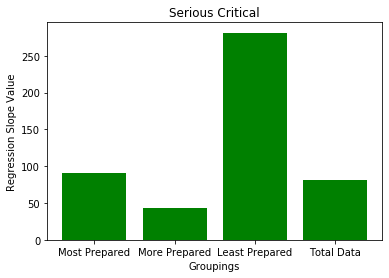

In [31]:
x = [GSH1_serious_critical_slope[0], GSH2_serious_critical_slope[0], GSH3_serious_critical_slope[0], serious_critical_slope[0]]
plt.bar(y,x, color="green")
plt.title("Serious Critical")
plt.xlabel("Groupings")
plt.ylabel("Regression Slope Value")
plt.show()

The regression slope values of the `Serious Critical` attribute appears to have variability in slope values. The Least Prepared cateogry has the largest regression slope compared to the other categories. Which indicates that the `Serious Critical` attribute is important factor in predicting `Total Cases` than the other models are. Overall since the slope values are very large and positive, that indicates that all of the categories will have a strong positive correlation with `Total Cases`.

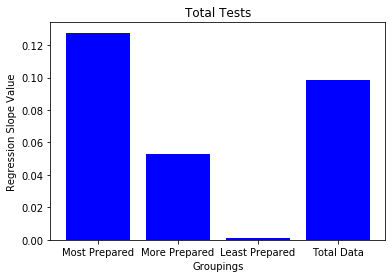

In [32]:
x = [GSH1_total_tests_slope[0], GSH2_total_tests_slope[0], GSH3_total_tests_slope[0], total_tests_slope[0]]
plt.bar(y,x, color="blue")
plt.title("Total Tests")
plt.xlabel("Groupings")
plt.ylabel("Regression Slope Value")
plt.show()

The regression slope values of the `Total Tests` attribute appears to have great variability in slope values. The Least Prepared cateogry has the smallest regression slope compared to the other categories. Which indicates that the `Total Tests` attribute is not as good in predicting Total Cases than the other models are. Overall since the slope values are very small (close to zero) that indicates that all of the categories will not have a correlation with  `Total Cases`.

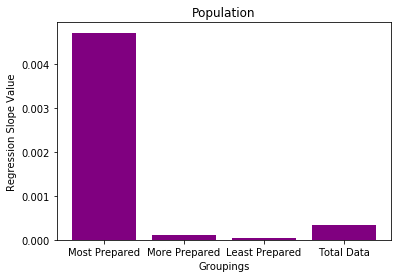

In [33]:
x = [GSH1_population_slope[0], GSH2_population_slope[0], GSH3_population_slope[0], population_slope[0]]
plt.bar(y,x, color="purple")
plt.title("Population")
plt.xlabel("Groupings")
plt.ylabel("Regression Slope Value")
plt.show()

The regression slope values of the `Population` attribute appears to be quite uniform, with the exception of the Most Prepared cateogry that has a much higher regression slope compared to the other categories. This indicates that the `Population` attribute is better equipped to predict `Total Cases` than the other models are. Overall, since the slope values are very small (close to zero) that indicates that all of the categories will not have a correlation with  `Total Cases`.

# IV. Evaluation of Significance

This evaluation will be presented in four seperate parts in order to thoroughly evaluate the significance of the data. The first section will evaluate the data relating to the entire dataset. The second section will evaluate the data relating to the Most Prepared category of the dataset. The third section will evaluate the data relating to the More Prepared category. The forth (and final) section will evaluate the data relating to the Least Prepared category of the dataset.

In evaluating the significance of the Linear Regression Models computed above for the various categories of data, I chose to conduct a y-permutation test. This test will evaluate just how strong the linear relationship between attributes has the potential be and evaluates whether or not the specific pairing that we actually saw in our data has a high or low correlation. The y-permuation testing technique, taught to us in Homework 8, allowed for me to visualize the distribution of a 1000 slopes that were computed using permuted y-values as well as determine just how many of the 1000 computed slopes are steeper than the one we found in our data analysis. If the number of slopes that are steeper than the observed slope is low, we can be confident that our data is not a result of a random relationship.

In [34]:
def permuted_y(c):
    return np.random.permutation(c.copy())

def y_permutation(x,y):
    from numpy import median
    slopes = np.zeros(1000)
    for index in range(1000):
        model = LinearRegression().fit(x.reshape(-1, 1), permuted_y(y).reshape(-1, 1))
        slopes[index] = model.coef_[0]
    plt.hist(slopes,bins=35, color = "maroon")
    plt.xlabel("slope")
    plt.ylabel("count")
    
def steeper_slope(slope,x,y):
    slopes = np.zeros(1000)
    for index in range(1000):
        model = LinearRegression().fit(x.reshape(-1, 1), permuted_y(y).reshape(-1, 1))
        slopes[index] = model.coef_[0]
    steep = 0
    for val in slopes:
        if abs(val)> abs(slope):
            #print(abs(val))
            steep = steep + 1
    return steep

#### Section 1: Evaluating Entire Covid-19 Dataset

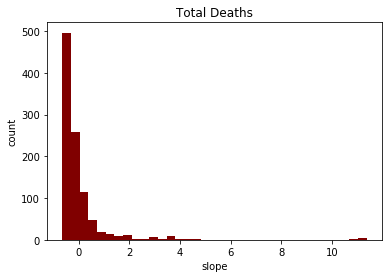

Slopes Steeper than Observed Slope: 0


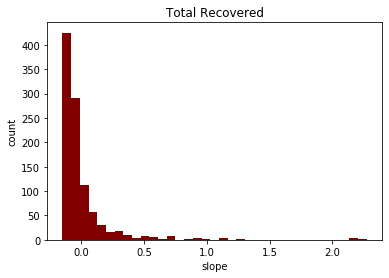

Slopes Steeper than Observed Slope: 0


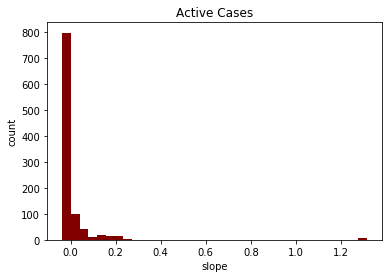

Slopes Steeper than Observed Slope: 0


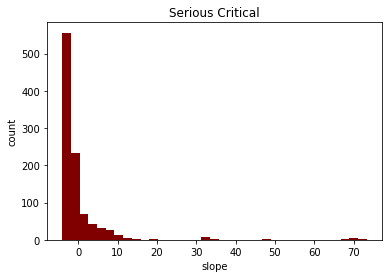

Slopes Steeper than Observed Slope: 0


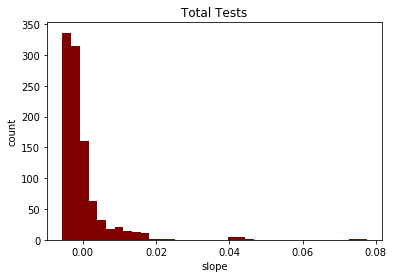

Slopes Steeper than Observed Slope: 0


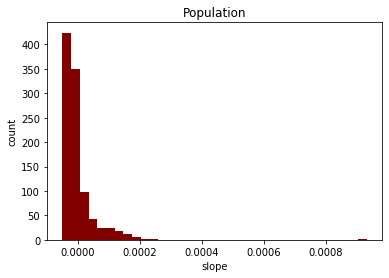

Slopes Steeper than Observed Slope: 9


In [35]:
categories = ['Total Deaths', 'Total Recovered','Active Cases', 'Serious Critical','Total Tests', 'Population']

for i in categories:
    x = covid[i]
    y = covid['Total Cases']
    y = y[np.logical_not(np.isnan(x))]
    x = x[np.logical_not(np.isnan(x))]
    y_permutation(x.values,y.values)
    plt.title(i)
    plt.show()
    
    #Number of Steeper Slopes
    model = LinearRegression().fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    slope = model.coef_[0]
    print("Slopes Steeper than Observed Slope:", steeper_slope(slope,x.values,y.values))

Based on the above results, we can be confident that all of the attributes are not a result of a random relationship with `Total Cases`. The `Population` attribute contains about 9 slopes that are steeper that the observed slope, however since that number is very low compared to the 1000 samples of slopes, I can confidently say that the data is not a result of a random relationship.

#### Section 2: Evaluating Covid-19 Dataset Grouped by Most Prepared Global Health Index

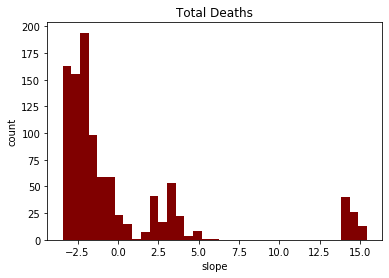

Slopes Steeper than Observed Slope: 0


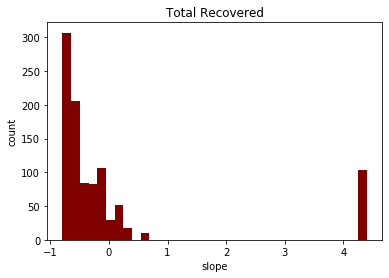

Slopes Steeper than Observed Slope: 0


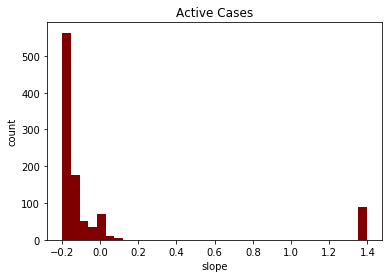

Slopes Steeper than Observed Slope: 0


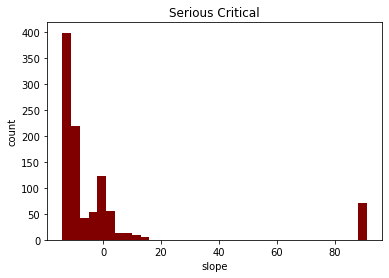

Slopes Steeper than Observed Slope: 0


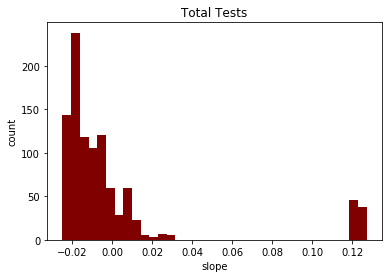

Slopes Steeper than Observed Slope: 0


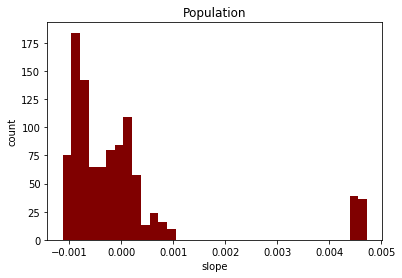

Slopes Steeper than Observed Slope: 3


In [36]:
categories = ['Total Deaths', 'Total Recovered','Active Cases', 'Serious Critical','Total Tests', 'Population']

for i in categories:
    x = GHS_1[i]
    y = GHS_1['Total Cases']
    y=y[np.logical_not(np.isnan(x))]
    x=x[np.logical_not(np.isnan(x))]
    y_permutation(x.values,y.values)
    plt.title(i)
    plt.show()
    
    #Number of Steeper Slopes
    model = LinearRegression().fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    slope = model.coef_[0]
    print("Slopes Steeper than Observed Slope:", steeper_slope(slope,x.values,y.values))

Based on the above results, we can be confident that all of the attributes are not a result of a random relationship with `Total Cases`. The `Population` attribute contains about 3 slopes that are steeper that the observed slope, because that number is so low compared to the 1000 samples of slopes, I can confidently say that the data is not a result of a random relationship.

#### Section 3: Evaluating Covid-19 Dataset Grouped by More Prepared Global Health Index

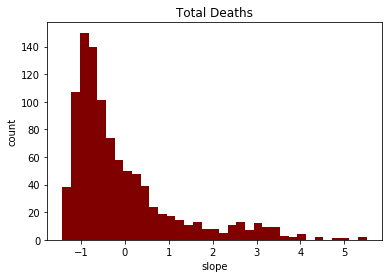

Slopes Steeper than Observed Slope: 0


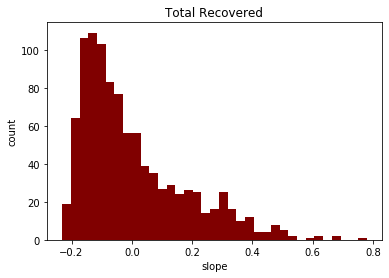

Slopes Steeper than Observed Slope: 0


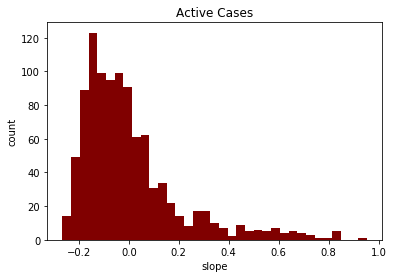

Slopes Steeper than Observed Slope: 0


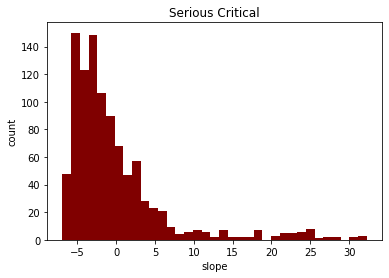

Slopes Steeper than Observed Slope: 0


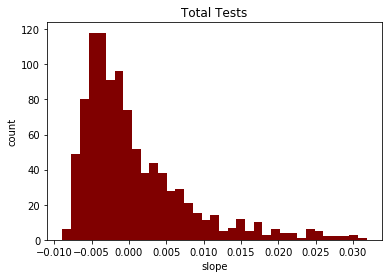

Slopes Steeper than Observed Slope: 0


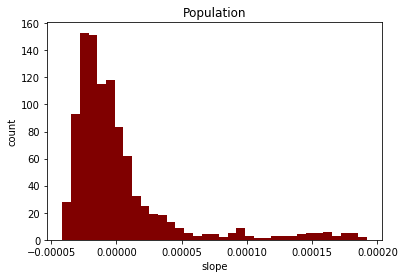

Slopes Steeper than Observed Slope: 33


In [37]:
categories = ['Total Deaths', 'Total Recovered','Active Cases', 'Serious Critical','Total Tests', 'Population']

for i in categories:
    x = GHS_2[i]
    y = GHS_2['Total Cases']
    y=y[np.logical_not(np.isnan(x))]
    x=x[np.logical_not(np.isnan(x))]
    y_permutation(x.values,y.values)
    plt.title(i)
    plt.show()
    
    #Number of Steeper Slopes
    model = LinearRegression().fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    slope = model.coef_[0]
    print("Slopes Steeper than Observed Slope:", steeper_slope(slope,x.values,y.values))

Based on the above results, we can be confident that all of the attributes are not a result of a random relationship with `Total Cases`. The `Population` attribute contains about 33 slopes that are steeper that the observed slope, since this number is a bit high, I cannot confidently say that the `Population` attributes' relationship with `Total Cases` is not a result of a random relationship.

#### Section 4: Evaluating Covid-19 Dataset Grouped by Least Prepared Global Health Index

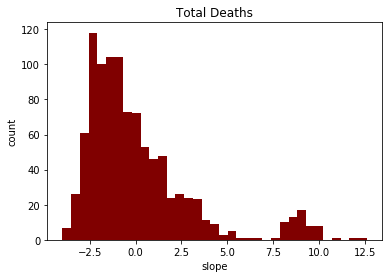

Slopes Steeper than Observed Slope: 0


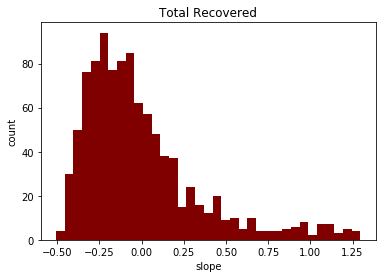

Slopes Steeper than Observed Slope: 0


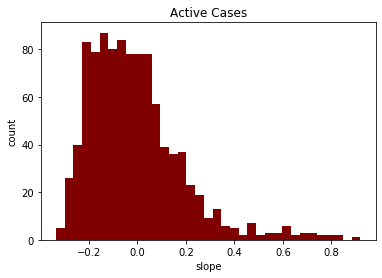

Slopes Steeper than Observed Slope: 0


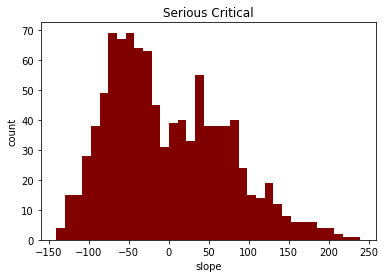

Slopes Steeper than Observed Slope: 0


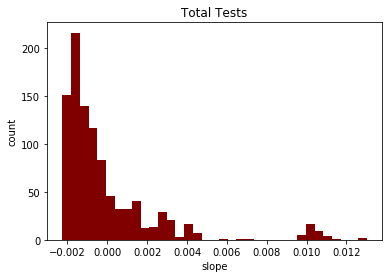

Slopes Steeper than Observed Slope: 649


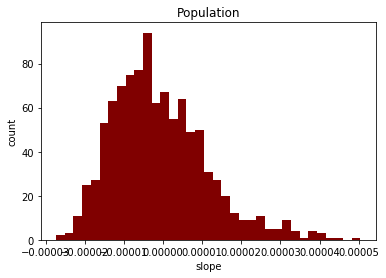

Slopes Steeper than Observed Slope: 2


In [38]:
categories = ['Total Deaths', 'Total Recovered','Active Cases', 'Serious Critical','Total Tests', 'Population']

for i in categories:
    x = GHS_3[i]
    y = GHS_3['Total Cases']
    y=y[np.logical_not(np.isnan(x))]
    x=x[np.logical_not(np.isnan(x))]
    y_permutation(x.values,y.values)
    plt.title(i)
    plt.show()
    
    #Number of Steeper Slopes
    model = LinearRegression().fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    slope = model.coef_[0]
    print("Slopes Steeper than Observed Slope:", steeper_slope(slope,x.values,y.values))

Based on the above results, we can be confident that all of the attributes are not a result of a random relationship with `Total Cases`. The `Total Test` attribute contains about 649 slopes that are steeper that the observed slope, which is a very large number. Therefore, I cannot confidently say that the `Total Test` attributes' relationship with `Total Cases` is not a result of a random relationship.

# V. Conclusion

In my attempt to develop a model that analyzes the different attributes that potentially affect the total cases of Covid-19 within nations, the results were quite interesting. My intution when analyzing the various categories of data was that all attributes would have strong positive correlations. This was because I thought that as attributes  `Total Deaths`, `Total Recovered`, `Active Cases`, `Serious Critical`, `Total Tests`, and `Population` increase that so would the `Total Cases` per nation. I decided to look further into the correlation between these attributes and `Total Cases` per nation by conducting a linear regression analysis of the attributes for every data category (Most, More, Least, Total). 

Overall the results of the linear regression analyses for the four data categories follow the following trends:
- The attributes `Total Deaths`,`Serious Critical`,`Total Recovered`, and `Active Cases` have a positve correlation with `Total Cases`. However the relative strengths of those correlations differ, with `Serious Critical` having the strongest correlation among all other attributes. 
- The attributes `Total Tests` and `Population` had slope values that were extremely close to 0, which indicates that there is virtually no relationship between these attributes and `Total Cases`. 
- In an effort to evaluate the signifcance of the results, I conducted a y-permuation test in order to determine if my results are due to a random relationship. What I found was that from the six attributes across the four data cateogories was that the attributes `Total Deaths`,`Serious Critical`,`Total Recovered`, and `Active Cases` are likely not a result of a random relationship. 
- However the attributes `Total Tests` and `Population` are likely a result of a random relationship since the y-permuation test revealed that there are a number of slopes steeper than the observed slope.

This results of this analysis may be of interest to governmental leadership as they decide how to limit the spread of Covid-19 within their respective nations. Information regarding how different attributes are correlated with `Total Cases` allow leaders to know what attributes they could utilize to predict the `Total Cases` in their respective nations. For example, since the `Serious Critical` attribute has a very strong positive correlation with `Total Cases` that means that it is an important factor in predicting `Total Cases`. Meaning that if governements notice an increase in `Serious Critical` cases that could lead them to investigate if their `Total Cases` are increasing as well. 

# VII. Source Code

My github repository contains the following files (not including this file):

- Web Scraping Country Data.ipynb : This file contains all the code I used to webscrape the Covid-19 dataset from Worldometer.info

- final_dataset.csv : This is the csv file that was created as a result of saving my webscraped dataframe into this file, in order to utilize for this final report

- GSH.csv : This csv file was taken from the 2019 Global Health Security Index and configured to contain data that I was able to utilize in my analysis.

The github link to my project repository is: https://github.com/ayeshakemal/info2950finalproj

# VII. Acknowledgements

The source of the data utilized in this report comes from:

- https://www.worldometers.info/coronavirus/ (Webscraped Covid-19 Dataset)

- https://www.ghsindex.org/report-model/ (Manually Created GHS Index Dataset)



The following websites were helpful in creating visualizations, evaluating the signifcance of the data, and understanding various analyses:

- https://towardsdatascience.com/intro-to-geographical-plotting-237f59fec735
- Homework 8 and Greg's Recitation
- Professor Mimno's lectures
